# Decision Tree classifier

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [2]:
df=sns.load_dataset('iris')
print("Iris data loaded Succesfully..")

Iris data loaded Succesfully..


In [3]:
pwd

'C:\\Users\\singhegm'

In [4]:
df.head(12)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [9]:
Y = df['species']
Y[0:5]

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [11]:
print('training size of independent feature :', x_train.shape)
print('training size of dependent/target feature :', y_train.shape)

print('\n-----------------------------------------\n')

print('testing size of independent feature :', x_test.shape)
print('testing of dependent/target feature :', y_test.shape)

training size of independent feature : (120, 4)
training size of dependent/target feature : (120,)

-----------------------------------------

testing size of independent feature : (30, 4)
testing of dependent/target feature : (30,)


In [12]:
speciesTree=DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [13]:
speciesTree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [14]:
predTree=speciesTree.predict(x_train)

In [15]:
print (predTree[10:25])
print (y_train[10:25])

['virginica' 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'setosa'
 'versicolor' 'versicolor' 'virginica' 'setosa' 'versicolor' 'virginica'
 'virginica' 'versicolor']
135     virginica
7          setosa
65     versicolor
10         setosa
132     virginica
13         setosa
15         setosa
61     versicolor
91     versicolor
116     virginica
27         setosa
69     versicolor
118     virginica
136     virginica
97     versicolor
Name: species, dtype: object


# Accuracy

In [16]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_train, predTree))

DecisionTrees's Accuracy:  0.975


In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, predTree))

[[34  0  0]
 [ 0 43  2]
 [ 0  1 40]]


In [18]:
predTree=speciesTree.predict(x_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9666666666666667


In [19]:
print(confusion_matrix(y_test, predTree))

[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]


#  visualizing the decision tree

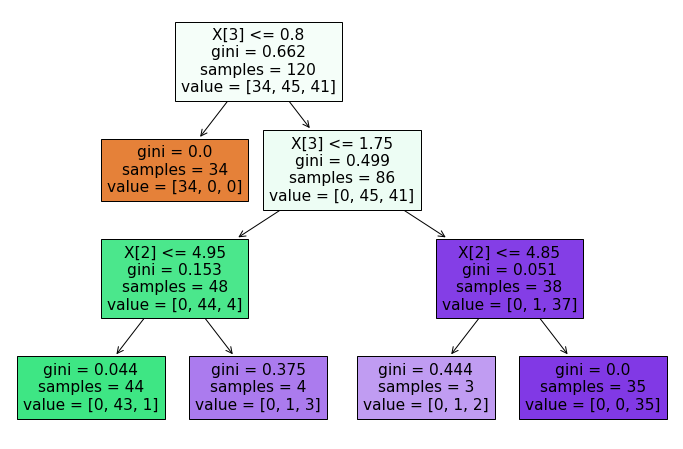

In [20]:
from sklearn import tree
plt.figure(figsize = (12, 8))
fig = tree.plot_tree(speciesTree, filled = True)